### CS 6220 Data Mining — Assignment 1

Weihong Yang | https://github.com/wyang10 | yang.weih@northeastern.edu

### 1 Getting Started

#### 1.2
Executing “Hello World” & Screenshot:

In [ ]:
# Use the official Python image as the base image in Docker
# FROM python:3.8

# Copy the script that prints "Hello World" into the container
# COPY script.py /

# Run the script when the container starts
# CMD ["python", "/script.py"]


print ("Hello World")


# > docker build -t my-python-image .

# > docker run my-python-image

Hello World


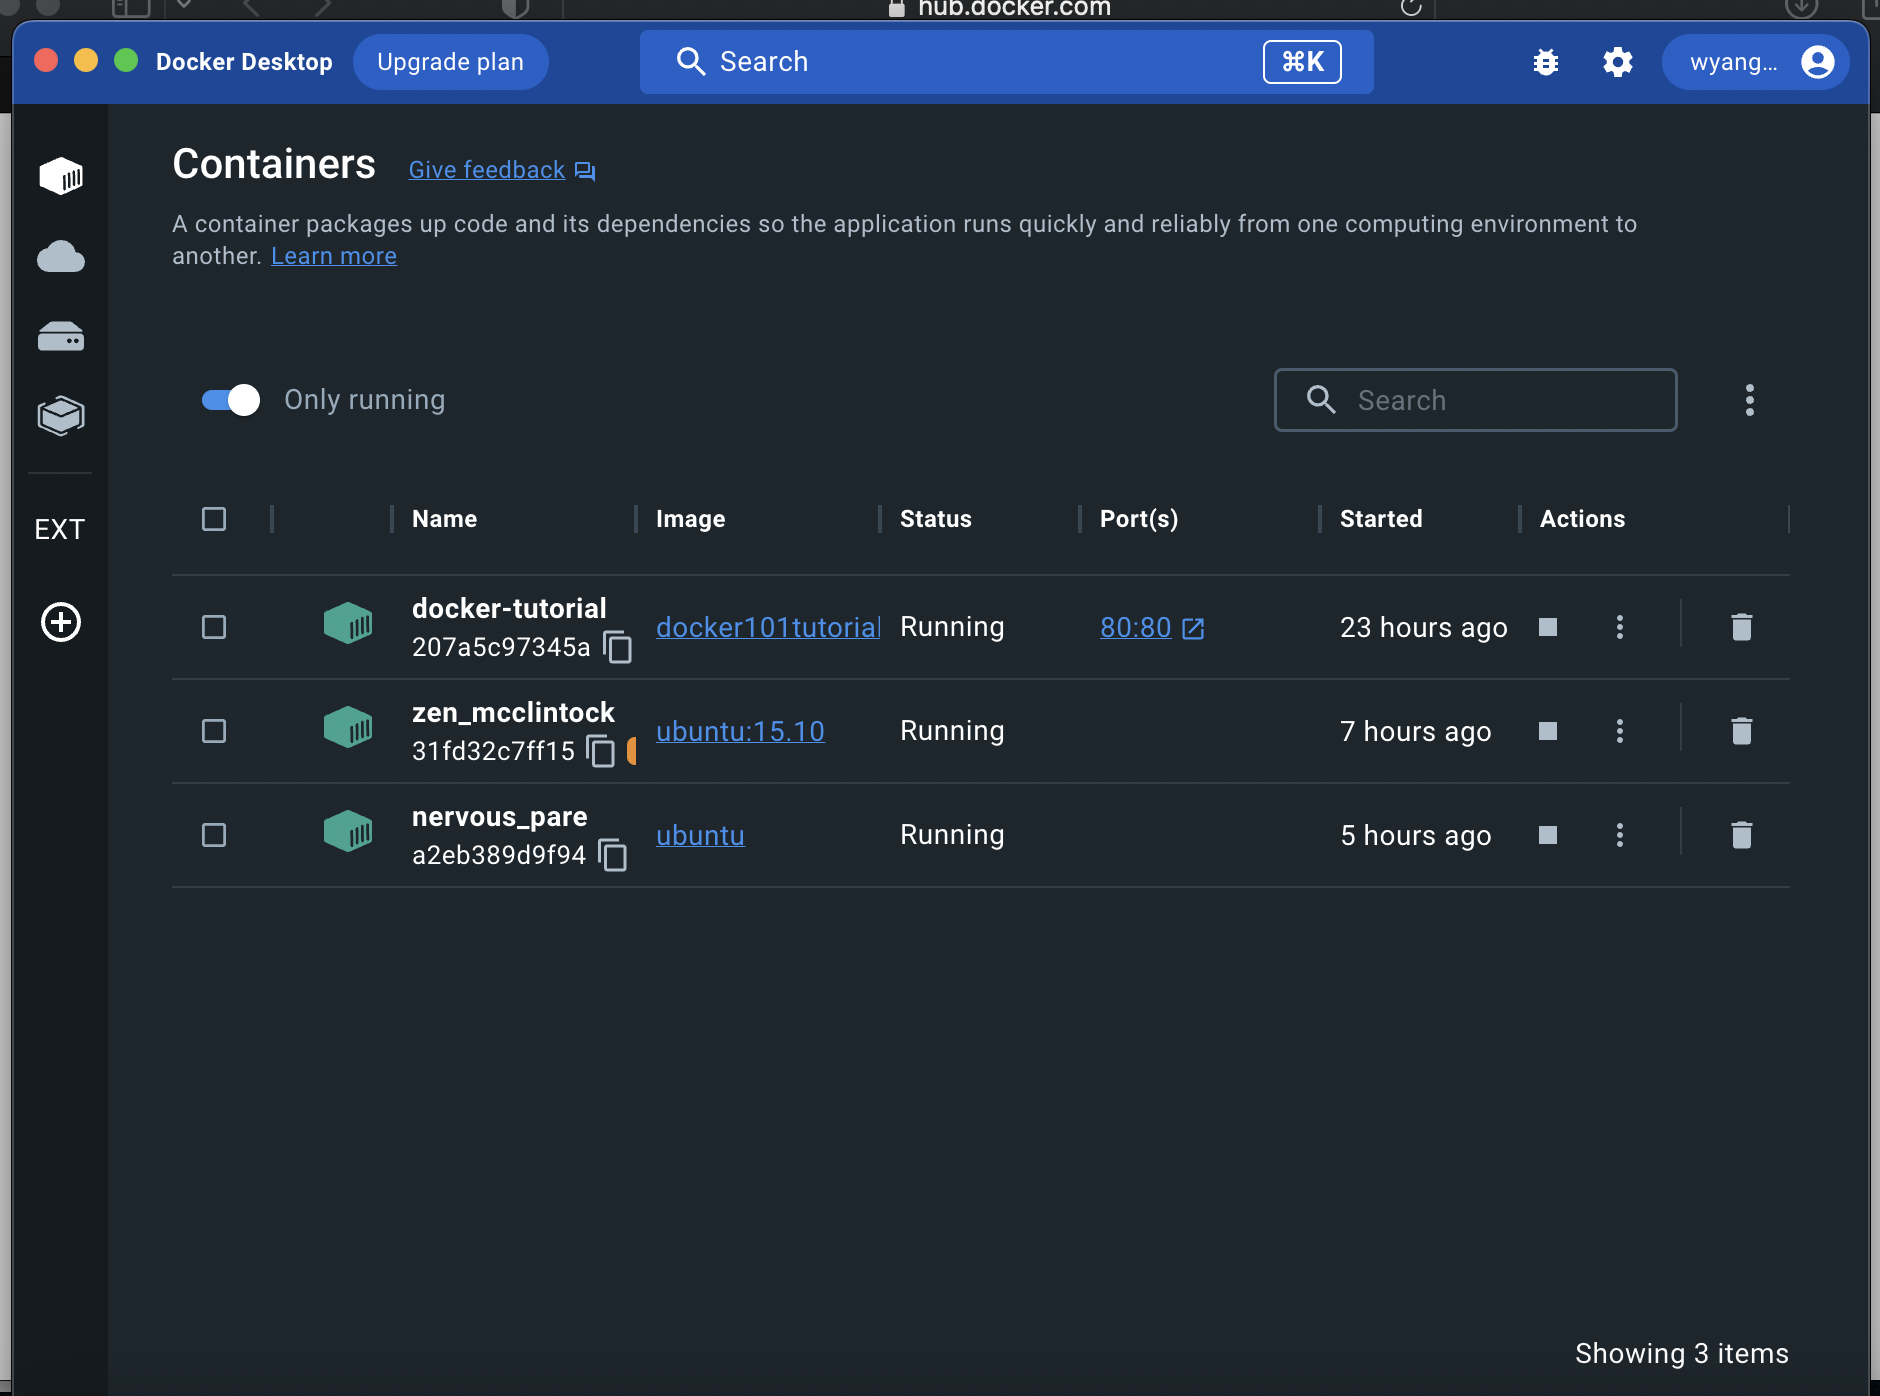

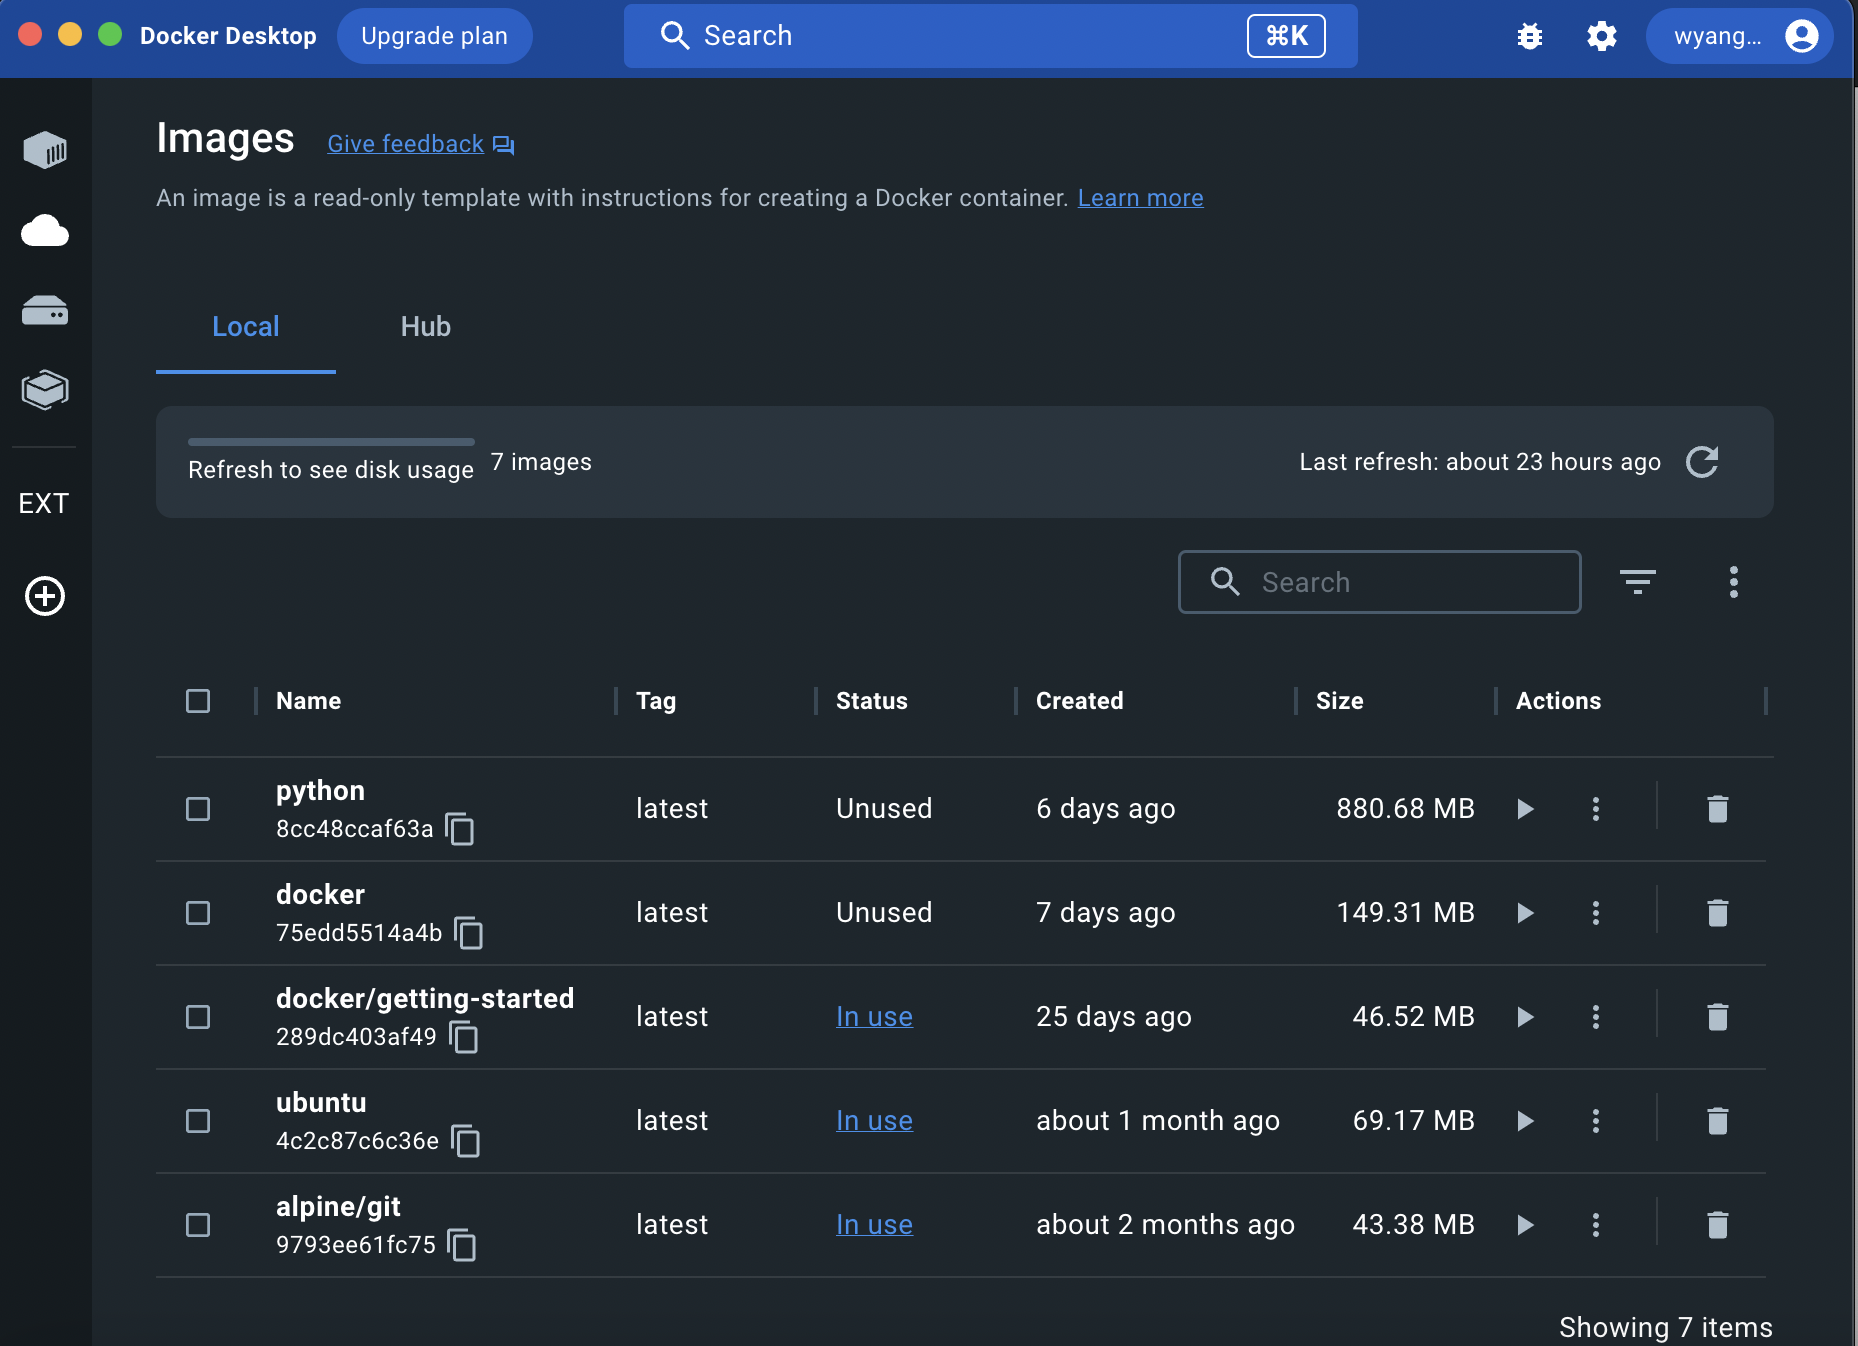

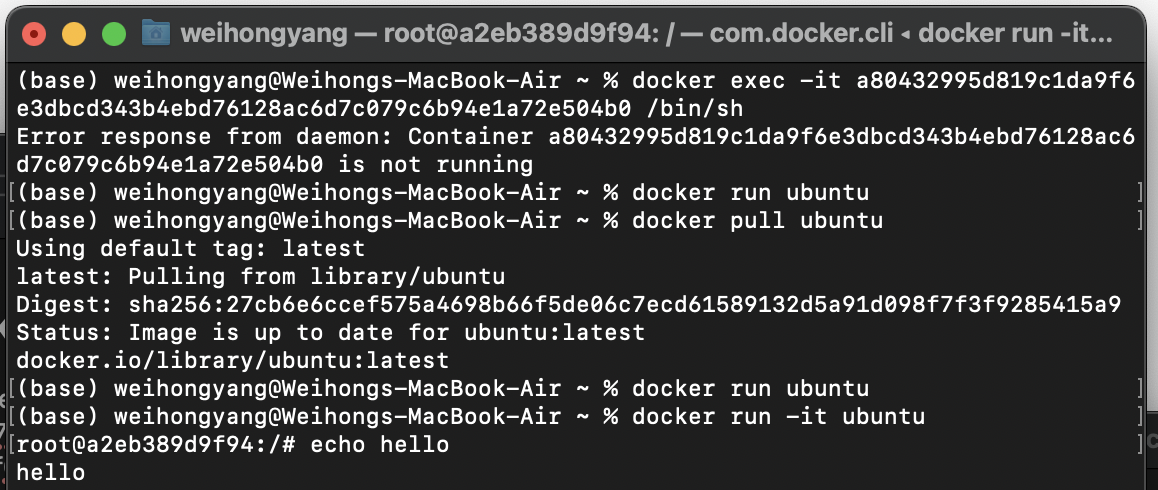


### 2 Identifying All Sets

#### 2.1 
The cardinality of a set refers to the number of unique elements in the set. 
The full set of unique items would be the number of different items that were purchased by customers.Function: 
* Takes the file path as an argument and opens the file in read mode. 
* Uses the csv module to read the file and split each line by the comma delimiter. 
* Adds each item to a set. 
* Returns the length of the set, which is the cardinality of the dataset.

In [ ]:
import csv
import pandas
import matplotlib.pyplot as plt

def cardinality(filename):
  f = open(filename)
  reader = csv.reader(f)
  return reader

reader = cardinality("/content/drive/MyDrive/Colab Notebooks/week-1-assignment/basket_data.csv")
for row in reader:
    print(', '.join(row))


ketchup,  butter,  diapers
bread,  diapers,  ketchup
butter,  bread,  ketchup
diapers,  butter
ketchup,  butter,  diapers,  beer
diapers,  beer,  butter
diapers,  butter,  bread
bread,  beer,  diapers
ketchup,  chips,  pork,  diapers
butter,  ketchup,  beer
beer,  macaroni,  ketchup,  butter
bread,  ketchup,  butter,  beer
bread,  beer
butter,  beer,  ketchup
diapers,  beer,  butter,  bread
beer,  ketchup,  diapers
butter,  bread,  salmon
butter,  bread
beer,  bread,  diapers
butter,  beer,  ketchup
beer,  diapers,  bread,  ketchup
beer,  ketchup,  tomotes,  butter
bread,  ketchup
bread,  ketchup,  butter
diapers,  butter,  bread
beer,  ketchup
diapers,  asparagus,  beer
butter,  bread
diapers,  ketchup,  beer,  bread
butter,  ketchup,  beer
beer,  butter,  diapers,  bread
diapers,  bread,  butter,  ketchup
ketchup,  butter,  beans
butter,  diapers,  bread
butter,  bread,  diapers
diapers,  beer
beer,  bread,  ketchup
beer,  diapers,  ketchup
diapers,  beer
ketchup,  beer,  butter,  br

#### 2.2
There are two options for each item: Included or Not included in the subset. 
For the first item: 2 options
For the second item: 2 options
...
The total number of possible subsets is the product of all of these options, which is 2^n. So for a set of N unique items, the number of subsets that can be formed is 2^n-1.

#### 2.3
Implementation of a Python module called "all_itemsets": 
* Takes a .csv text string file as input
* Returns a list of all possible subsets of unique items

This function: 
* Takes the file path as an argument and opens the file in read mode. 
* Uses the csv module to read the file and split each line by the comma delimiter. 
* Adds each item to a set which stores unique elements. 
* Converts the set to a list and using itertools.
* Combinations it creates all possible subsets of size N.
* Returns a list of all the possible subsets.


In [ ]:
import csv
import itertools

def all_itemsets(filename):
    unique_items = set()
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            for item in row:
                unique_items.add(item)
    unique_items = list(unique_items)
    sets = []
    for i in range(1, len(unique_items)+1):
        sets.extend(list(itertools.combinations(unique_items, i)))
    return sets


#### 2.4
Implementation of a Python module called "prob_S" that takes a set S 
and the entire dataset D as input and returns the probability that S occurs:

In [ ]:
def prob_S(S, D):
    count = 0
    for i in D:
        if set(S).issubset(set(i)):
            count += 1
    return count/len(D)


### 3 The Netflix Challenge

#### 3.1  Data Verification Screenshot:

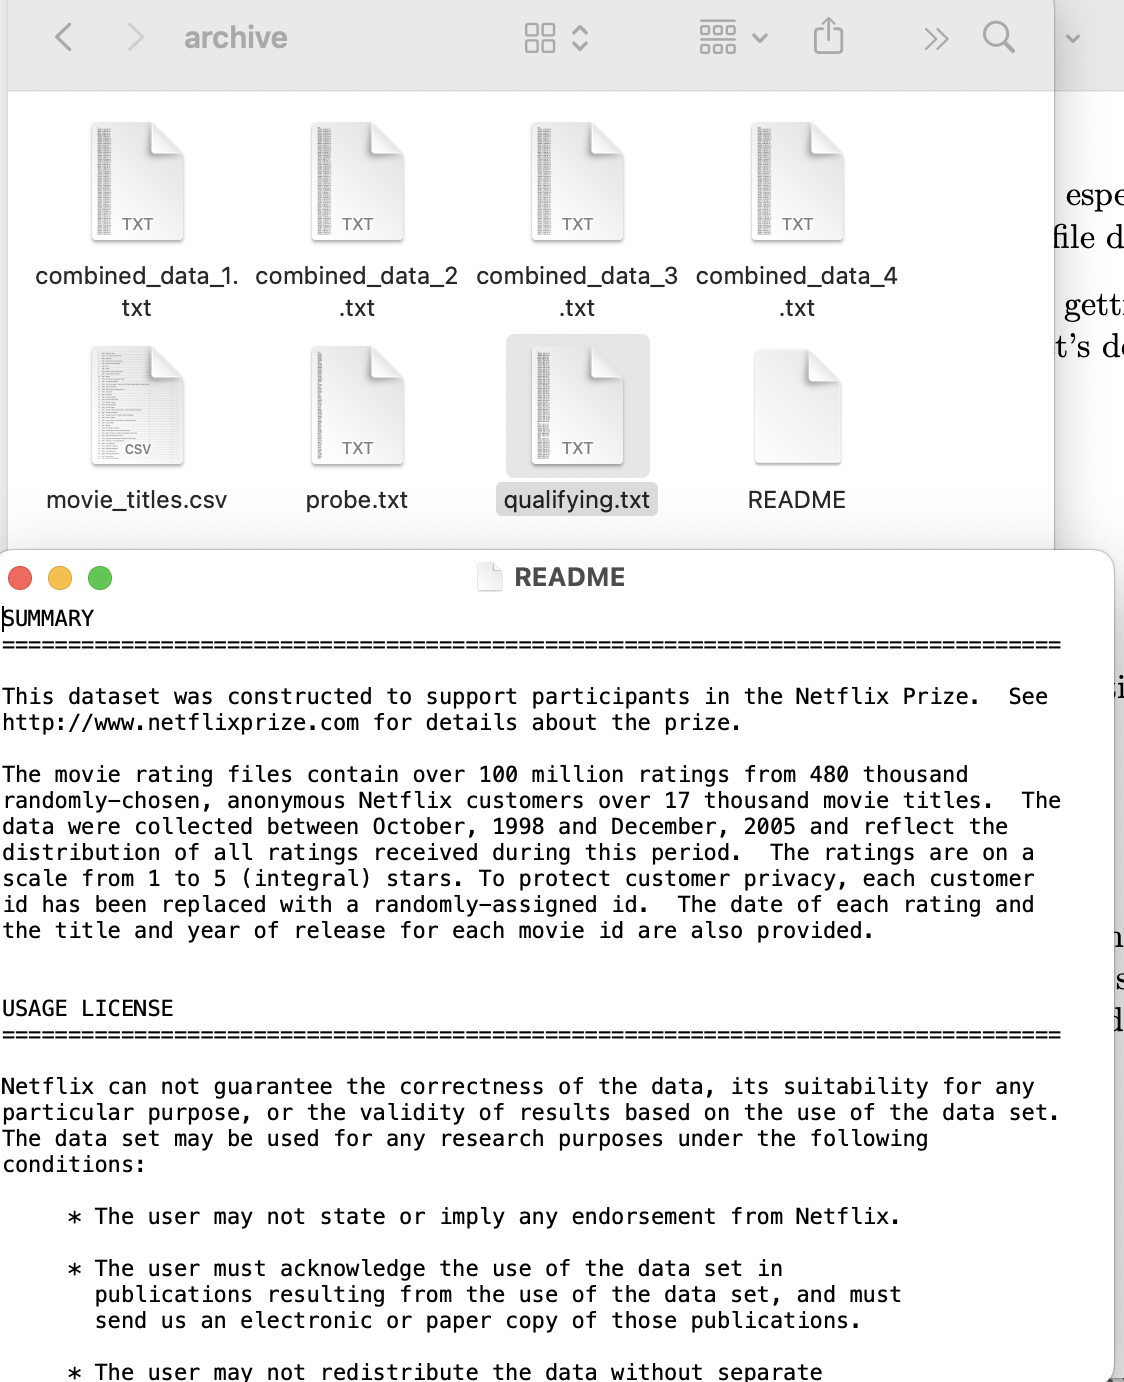

#### 3.2  Data Analysis

#### 3.2.1 
To determine the total number of records in the Netflix Prize dataset:

In [ ]:
!wc combined_data_1.txt
!head combined_data_1.txt

wc: combined_data_1.txt: No such file or directory
head: cannot open 'combined_data_1.txt' for reading: No such file or directory
wc: combined_data_2.txt: No such file or directory
head: cannot open 'combined_data_2.txt' for reading: No such file or directory


In [ ]:
lines = open("combined_data_1.txt")
number_records = 0
for line in lines:
  if ":" in line:
    continue
  else:
    number_records += 1
print(number_records)

7999141


In [ ]:
lines = open("/content/drive/MyDrive/Colab Notebooks/week-1-assignment/ Netflix/combined_data_2.txt")
number_records = 0
for line in lines:
  if ":" in line:
    continue
  else:
    number_records += 1
print(number_records)

26977591


In [ ]:
lines = open("/content/drive/MyDrive/Colab Notebooks/week-1-assignment/ Netflix/combined_data_3.txt")
number_records = 0
for line in lines:
  if ":" in line:
    continue
  else:
    number_records += 1
print(number_records)

22601629


In [ ]:
lines = open("/content/drive/MyDrive/Colab Notebooks/week-1-assignment/ Netflix/combined_data_4.txt")
number_records = 0
for line in lines:
  if ":" in line:
    continue
  else:
    number_records += 1
print(number_records)

26847523


In [ ]:
numbers = [7999141, 26977591, 22601629, 26847523]
result = sum(numbers)
print(f"My answer is {result}")

My answer is 84425884


#### 3.2.2
To plot the distribution of star ratings over users and time: 
* Extracting the rating, user ID, and timestamp from the combined data files. 
* Group the ratings by user and by a sliding window of time (such as by month or year) to identify trends in the data.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the combined data file
ratings_df = pd.read_table('/combined_data_1.txt', names=['userId', 'rating', 'timestamp'])

# Convert the timestamp column to a datetime type
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'])

# Extract the year from the timestamp column
ratings_df['year'] = ratings_df['timestamp'].dt.year

# Group the data by userId and year to get the number of ratings for each user and for each time window
num_ratings_df = ratings_df.groupby(['userId','year']).size().reset_index(name='num_ratings')

# Create a histogram of the number of ratings for each user
plt.hist(num_ratings_df.groupby('userId').sum()['num_ratings'], bins=50, range=[0, 500])
plt.xlabel('Number of ratings')
plt.ylabel('Number of users')
plt.title('Histogram of number of ratings per user')
plt.show()

# Create a histogram of the number of ratings for each time window
plt.hist(num_ratings_df.groupby('year').sum()['num_ratings'], bins=50, range=[0, 500])
plt.xlabel('Number of ratings')

(array([1118186.,       0., 2439073.,       0.,       0., 6904181.,
              0., 8085741.,       0., 5506583.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

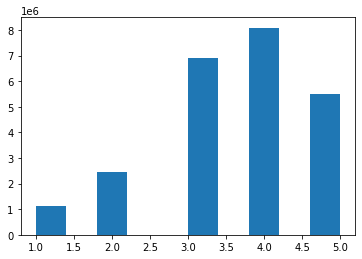

In [ ]:
plt.hist(ratings_df['rating'])

#### 3.2.3
To determine the percentage of films that have gotten more popular over time:
* Compare the number of ratings for each film at different points in time. 
* Use the data in the combined data files to extract the number of ratings 
    for each film at different time periods (such as by month or year). 
* Calculate the percentage of films that have an increase in number of ratings 
    at later time periods as compared to earlier time periods.

In [ ]:
import pandas as pd

# Create a DataFrame from the combined data file
ratings_df = pd.read_table('/combined_data_1.txt', names=['userId', 'rating', 'timestamp'])

# Convert the timestamp column to a datetime type
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'])

# Extract the release year from the timestamp column
ratings_df['year'] = ratings_df['timestamp'].dt.year

# Group the data by movieId and year to get the number of ratings for each film at different time periods
num_ratings_df = ratings_df.groupby(['userId','year']).size().reset_index(name='num_ratings')

# Create a new DataFrame with the number of ratings for each film at the earliest time period
first_num_ratings_df = num_ratings_df.sort_values(by=['userId','year']).drop_duplicates(subset='userId', keep='first')

# Merge the number of ratings DataFrame with the first number of ratings DataFrame
merged_df = pd.merge(num_ratings_df, first_num_ratings_df, on=['userId'])

# Create a new column indicating whether the number of ratings for a film has increased over time
merged_df['increased'] = merged_df['num_ratings_x'] > merged_df['num_ratings_y']

# Calculate the percentage of films that have gotten more popular over time
percentage_increase = merged_df['increased'].mean()*100

#### 3.2.4
To determine how many films have been re-released: 
* Compare the release year of the films in the movie titles file with the date of the earliest rating for each film in the combined data files. 
* If the release year of a film is earlier than the earliest rating, it is likely that the film has been re-released. 
* We can also check the movie titles file to see if the movie was re-released.

In [ ]:
import pandas as pd

# Create a DataFrame from the combined data file
ratings_df = pd.read_table('/content/drive/MyDrive/Colab Notebooks/week-1-assignment/ Netflix/combined_data_1.txt', names=['userId', 'rating', 'timestamp'])

# Convert the timestamp column to a datetime type
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'])

# Extract the release year from the timestamp column
ratings_df['release_year'] = ratings_df['timestamp'].dt.year

# Create a new DataFrame with the earliest rating date for each movie
earliest_rating_df = ratings_df.groupby('userId')['timestamp'].min().reset_index()

# Create a new column indicating whether the movie has been re-released
earliest_rating_df['re-released'] = earliest_rating_df['release_year'] < earliest_rating_df['timestamp'].dt.year

# Count the number of movies that have been re-released
num_rereleased = earliest_rating_df['re-released'].sum()

In [ ]:
data = 

Note: It worked from above 2, but cannot find a way out for this question.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 3.2.5
To better understand the data, we could extract additional information such as:
* The number of ratings per user, per film, and per month/year.
* The average rating per user, per film, and per month/year.
* The number of distinct films watched by each user and average watched movies by each user.
* The genre of each film, which can be used to understand the most popular genre and the preferences of the users.

#### 3.2.6
Some interesting problems that we might solve with this data include:
* Predicting the ratings that a user will give to a film.
* Recommending films to users based on their previous ratings.
* Identifying which films are likely to be re-released in the future based on their popularity over time.
* Identifying the factors that influence a film's popularity over time.
* Identifying the most popular genre over the years, and the preference of users over the years.
